## Seaborn
> * Seaborn is a Python data visualization library based on <u> matplotlib</u>. It provides a high-level interface for drawing attractive and informative statistical graphics.
> * <b> A Graph is worth a thousand words</b>. Seaborn has great ploting functions which operate on pandas dataframe and arrays contains whole dataset.

## Seaborn Features:
> * Relational
> * Distribution
> * Categorical
> * Regression
> * Multiples
> * Style
> * Color

This notebook discusses about <b> Distribution of data </b> seaborn feature. 

### Visualizing distributions of data
- To do data analysis, understanding variable distribution is important.
- Visualizing the data can answer below important questions:
```
    1. What range do the observations cover?
    2. What is their central tendency?
    3. Are they heavily skewed in one direction?
    4. Is there evidence for bimodality?
    5. Are there significant outliers? 
    6. Do the answers to these questions vary across subsets defined by other variables?
```
- The **distributions module** contains several functions designed to answer questions such as these. The axes-level functions are **histplot(), kdeplot(), ecdfplot(), and rugplot()**. They are grouped together within the figure-level **displot(), :func`jointplot`, and pairplot()** functions.
- There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand theses factors so that you can choose the best approach for your particular aim.

### Install seaborn library

In [1]:
#pip install seanborn
!pip3 install seaborn==0.11.0

In [2]:
#conda install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style(style="darkgrid")  # set graph theme style to dark with grid

#### Get the list of datasets available in seaborn library

In [5]:
dataset_names = sns.get_dataset_names()
df = pd.DataFrame(dataset_names, columns=['Seaborn Datasets'])
df

,Seaborn Datasets
0,anagrams
1,anscombe
2,attention
3,brain_networks
4,car_crashes
5,diamonds
6,dots
7,exercise
8,flights
9,fmri


### Plotting univariate histograms
- Most common approach to visualize the distribution of data is _histogram_
- This is the default approach in `displot()`, which uses the same underlying code as `histplot()`
- A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

In [6]:
penguins = sns.load_dataset("penguins")

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### <u> _sns.distplot documentation </u>

```python
Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)

Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual observations.

Extra keyword arguments are passed to the underlying function, so you should
refer to the documentation for each to understand the complete set of options
for making plots with this interface.

See the :doc:`distribution plots tutorial <../tutorial/distributions>` for a more
in-depth discussion of the relative strengths and weaknesses of each approach.
The distinction between figure-level and axes-level functions is explained
further in the :doc:`user guide <../tutorial/function_overview>`.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
hue : vector or key in ``data``
    Semantic variable that is mapped to determine the color of plot elements.
row, col : vectors or keys in ``data``
    Variables that define subsets to plot on different facets.    
kind : {"hist", "kde", "ecdf"}
    Approach for visualizing the data. Selects the underlying plotting function
    and determines the additional set of valid parameters.
rug : bool
    If True, show each observation with marginal ticks (as in :func:`rugplot`).
rug_kws : dict
    Parameters to control the appearance of the rug plot.
log_scale : bool or number, or pair of bools or numbers
    Set a log scale on the data axis (or axes, with bivariate data) with the
    given base (default 10), and evaluate the KDE in log space.
legend : bool
    If False, suppress the legend for semantic variables.
palette : string, list, dict, or :class:`matplotlib.colors.Colormap`
    Method for choosing the colors to use when mapping the ``hue`` semantic.
    String values are passed to :func:`color_palette`. List or dict values
    imply categorical mapping, while a colormap object implies numeric mapping.
hue_order : vector of strings
    Specify the order of processing and plotting for categorical levels of the
    ``hue`` semantic.
hue_norm : tuple or :class:`matplotlib.colors.Normalize`
    Either a pair of values that set the normalization range in data units
    or an object that will map from data units into a [0, 1] interval. Usage
    implies numeric mapping.
color : :mod:`matplotlib color <matplotlib.colors>`
    Single color specification for when hue mapping is not used. Otherwise, the
    plot will try to hook into the matplotlib property cycle.
col_wrap : int
    "Wrap" the column variable at this width, so that the column facets
    span multiple rows. Incompatible with a ``row`` facet.    
{row,col}_order : vector of strings
    Specify the order in which levels of the ``row`` and/or ``col`` variables
    appear in the grid of subplots.    
height : scalar
    Height (in inches) of each facet. See also: ``aspect``.    
aspect : scalar
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.    
facet_kws : dict
    Additional parameters passed to :class:`FacetGrid`.

kwargs
    Other keyword arguments are documented with the relevant axes-level function:

    - :func:`histplot` (with ``kind="hist"``)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``)

Returns
-------
:class:`FacetGrid`
    An object managing one or more subplots that correspond to conditional data
    subsets with convenient methods for batch-setting of axes attributes.

```

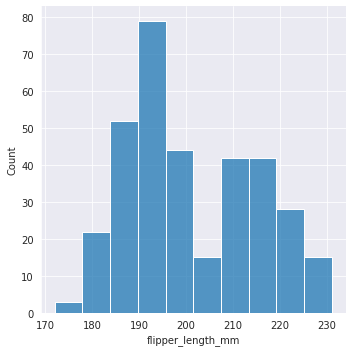

In [18]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

* This plot immediately affords a few insights about the `flipper_length_mm` variable. For instance, we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.


### Choosing the bin size

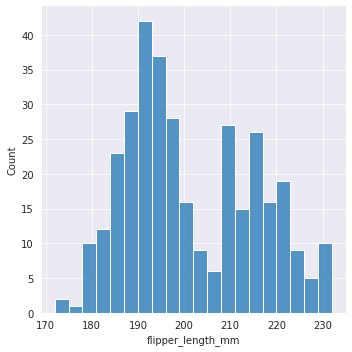

In [19]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

### Choosing number of bins

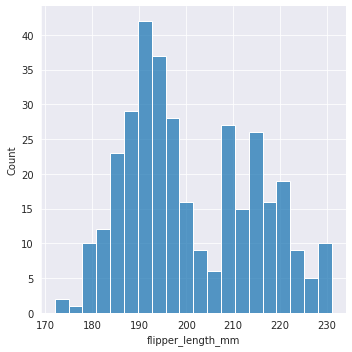

In [20]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

> * One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

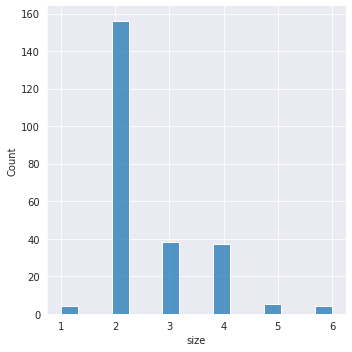

In [21]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

* One approach would be to specify the precise bin breaks by passing an array to bins:

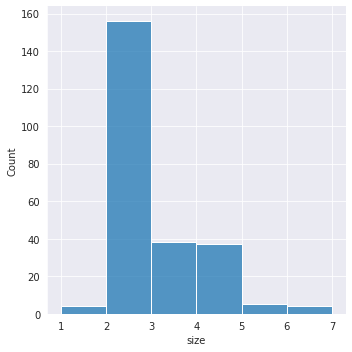

In [22]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

* This can also be accomplished by setting **`discrete=True`**, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

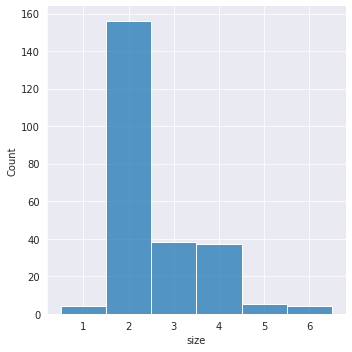

In [23]:
sns.displot(tips, x="size", discrete=True)

> It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to `“shrink”` the bars slightly to emphasize the categorical nature of the axis:

In [25]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

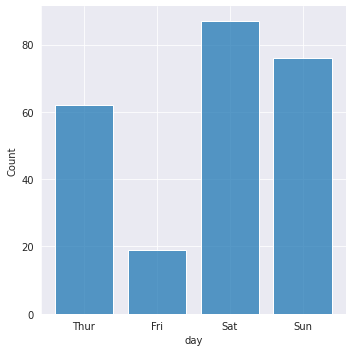

In [26]:
sns.displot(tips, x="day", shrink=.8)

#### Conditioning on other variables
> * Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? 
> * **`displot()`** and **`histplot()`** provide support for conditional subsetting via the **`hue`** semantic. Assigning a variable to ``hue will draw a separate histogram for each of its unique values and distinguish them by color:

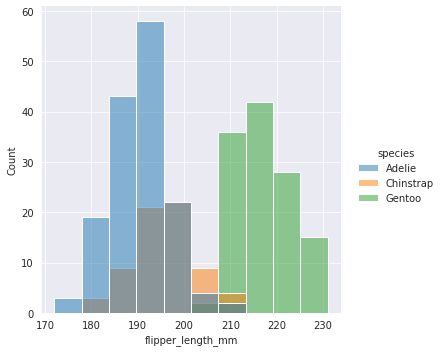

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

* By default, the different histograms are `“layered”` on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a `“step”` plot:

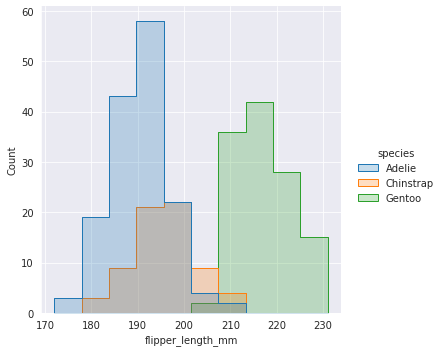

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

* Alternatively, instead of layering each bar, they can be `“stacked”`, or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

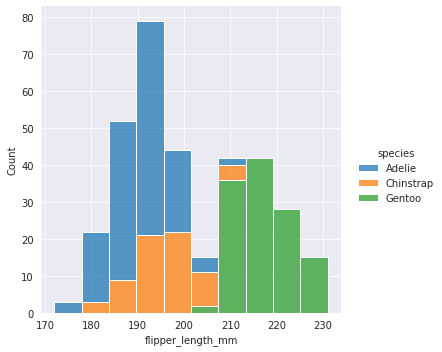

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

* The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

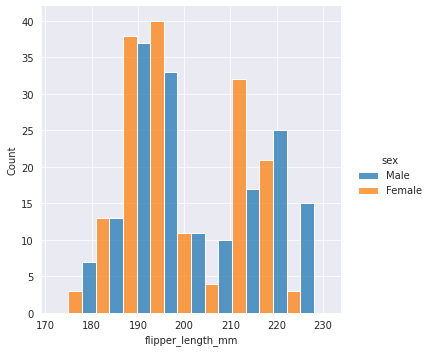

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

* Because **`displot()`** is a figure-level function and is drawn onto a `FacetGrid`, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to col or row rather than (or in addition to) hue. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

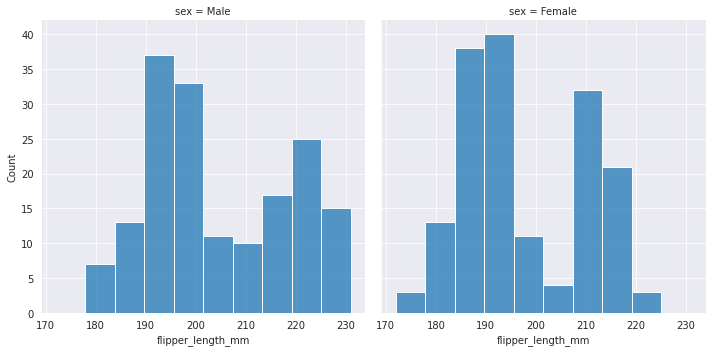

In [31]:
sns.displot(penguins, x="flipper_length_mm", col="sex", multiple="dodge")

### Normalized histogram statistics

* Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

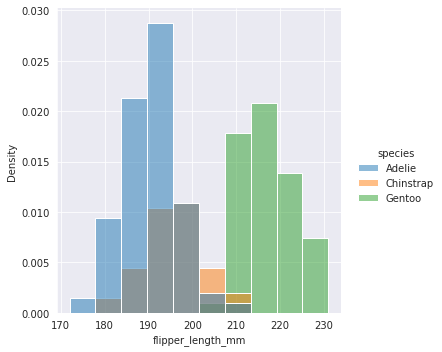

In [32]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

* By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting **`common_norm=False`**, each subset will be normalized independently:

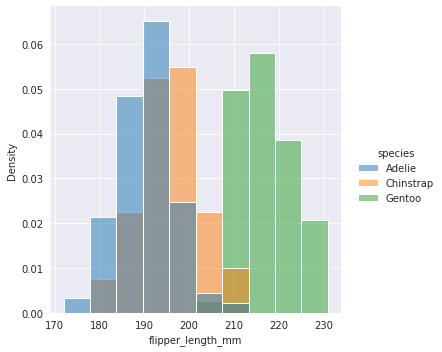

In [33]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

* Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their heights sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

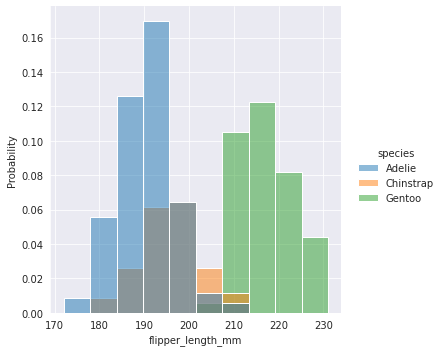

In [34]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

### Kernel density estimation
> * A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

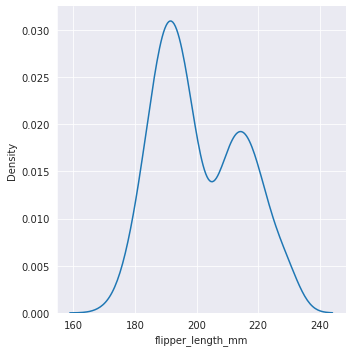

In [35]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth
> * Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

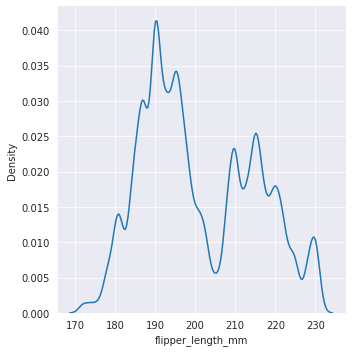

In [36]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

* Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

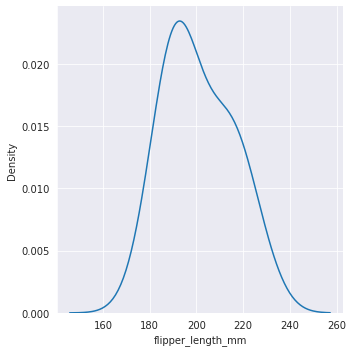

In [37]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables
* As with histograms, if you assign a hue variable, a separate density estimate will be computed for each level of that variable:

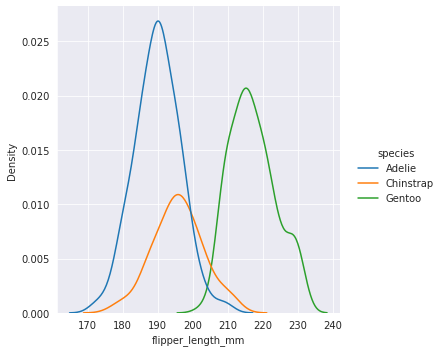

In [38]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

* In many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the KDE as well, however:

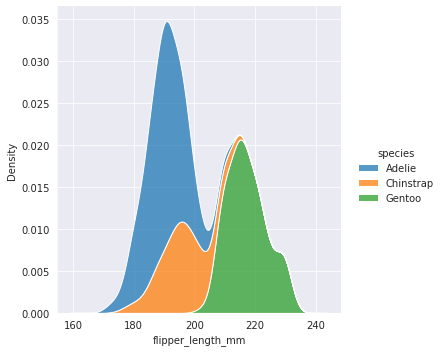

In [39]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

* Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the individual densities are easier to resolve.

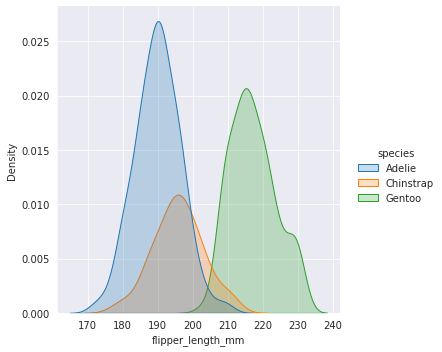

In [40]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls
* KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a varible reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

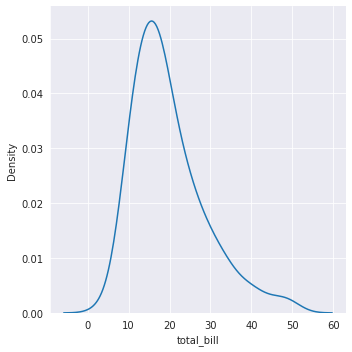

In [41]:
sns.displot(tips, x="total_bill", kind="kde")

* This can be partially avoided with the **`cut`** parameter, which specifies how far the curve should extend beyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artifically low at the extremes of the distribution:

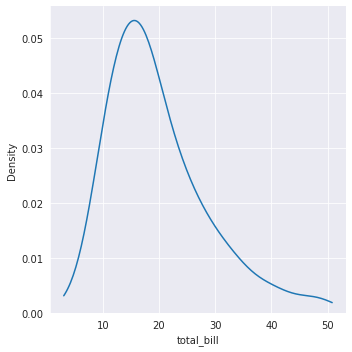

In [42]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

* The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

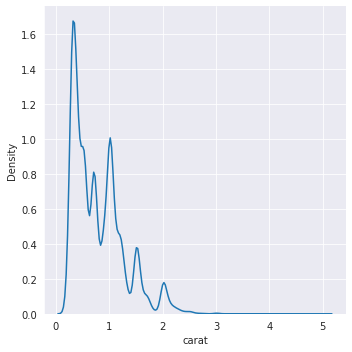

In [44]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

* While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

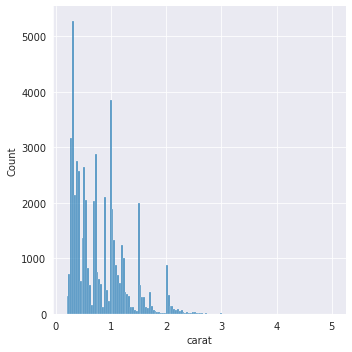

In [45]:
sns.displot(diamonds, x="carat")

* As a compromise, it is possible to combine these two approaches. While in histogram mode, **`displot()`** (as with histplot()) has the option of including the **`smoothed KDE curve (note kde=True, not kind="kde")`**:

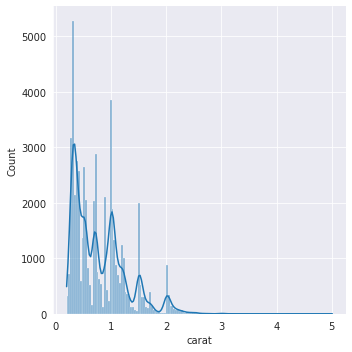

In [46]:
sns.displot(diamonds, x="carat", kde=True)

### Empirical cumulative distributions
* A third option for visualizing distributions computes the **`“empirical cumulative distribution function” (ECDF)`**. This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

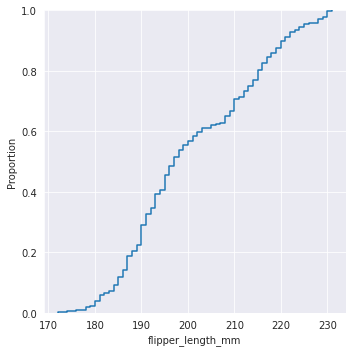

In [47]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

* The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

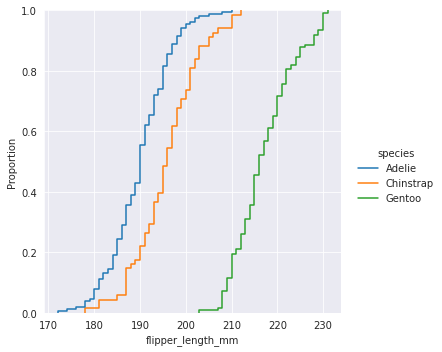

In [48]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

* The major downside to the ECDF plot is that it represents the shape of the distribution less intuitively than a histogram or density curve. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes. Nevertheless, with practice, you can learn to answer all of the important questions about a distribution by examining the ECDF, and doing so can be a powerful approach.

### Visualizing bivariate distributions
> * All of the examples so far have considered **`univariate distributions`**: distributions of a single variable, perhaps conditional on a second variable assigned to **`hue`**. Assigning a second variable to **`y`**, however, will plot a **`bivariate distribution`**:

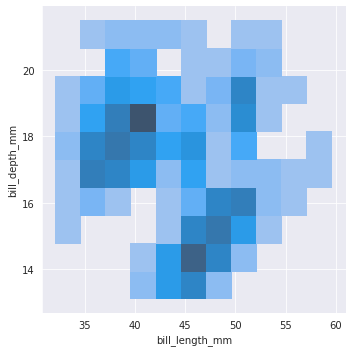

In [49]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

* A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analagous to a heatmap()). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the **`contours`** of the 2D density:

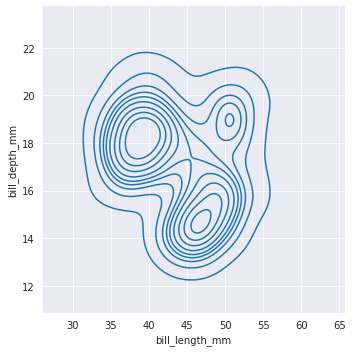

In [50]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

* Assigning a hue variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

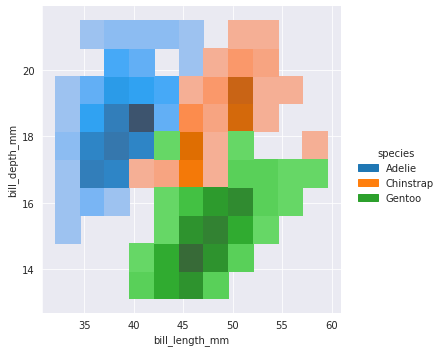

In [51]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

* The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

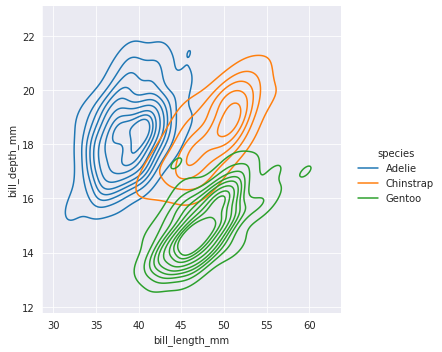

In [52]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

* Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

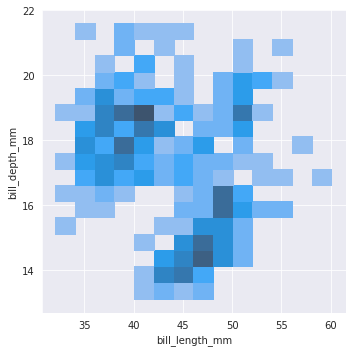

In [53]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

* To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:

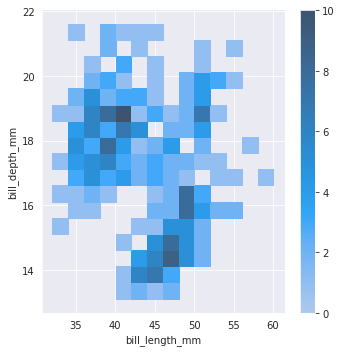

In [54]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

* The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at _iso-proportions_ of the density, meaning that each curve shows a level set such that some proportion p of the density lies below it. The p values are evenly spaced, with the lowest level contolled by the **`thresh`** parameter and the number controlled by **`levels`**:

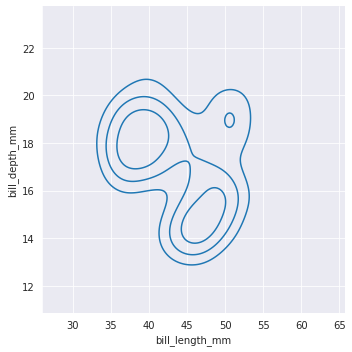

In [55]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

* The **`levels`** parameter also accepts a list of values, for more control:

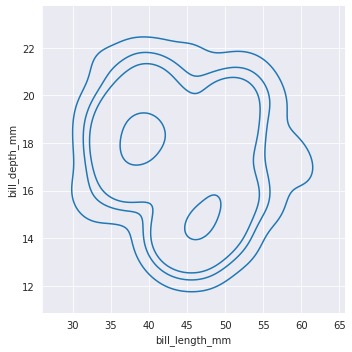

In [57]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

* The bivariate histogram allows one or both variables to be discrete. Plotting one discrete and one continuous variable offers another way to compare conditional univariate distributions:

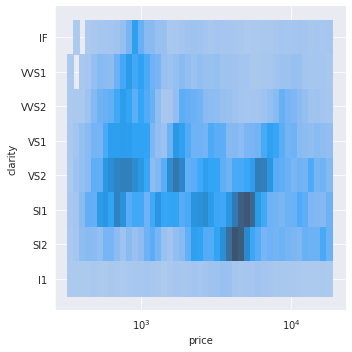

In [58]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

* In contrast, plotting two discrete variables is an easy to way show the cross-tabulation of the observations:

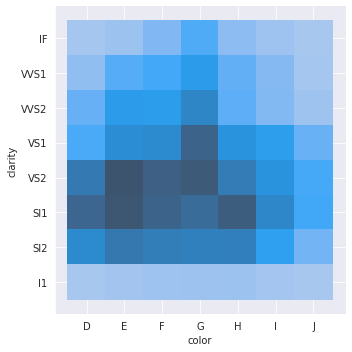

In [59]:
sns.displot(diamonds, x="color", y="clarity")

### Distribution visualization in other settings
> Several other figure-level plotting functions in seaborn make use of the histplot() and kdeplot() functions.

#### Plotting joint and marginal distributions
> The first is **`jointplot()``**, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, **`jointplot()`** represents the bivariate distribution using **`scatterplot()`** and the marginal distributions using **`histplot()`**:

**`jointplot documentation`**:
```python
    Signature:
sns.jointplot(
    *,
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    **kwargs,
)

Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
    Kind of plot to draw. See the examples for references to the underlying functions.
color : :mod:`matplotlib color <matplotlib.colors>`
    Single color specification for when hue mapping is not used. Otherwise, the
    plot will try to hook into the matplotlib property cycle.
height : numeric
    Size of the figure (it will be square).
ratio : numeric
    Ratio of joint axes height to marginal axes height.
space : numeric
    Space between the joint and marginal axes
dropna : bool
    If True, remove observations that are missing from ``x`` and ``y``.
{x, y}lim : pairs of numbers
    Axis limits to set before plotting.
marginal_ticks : bool
    If False, suppress ticks on the count/density axis of the marginal plots.
{joint, marginal}_kws : dicts
    Additional keyword arguments for the plot components.
hue : vector or key in ``data``
    Semantic variable that is mapped to determine the color of plot elements.
    Semantic variable that is mapped to determine the color of plot elements.
palette : string, list, dict, or :class:`matplotlib.colors.Colormap`
    String values are passed to :func:`color_palette`. List or dict values
    imply categorical mapping, while a colormap object implies numeric mapping.
hue_order : vector of strings
    Specify the order of processing and plotting for categorical levels of the
    ``hue`` semantic.
hue_norm : tuple or :class:`matplotlib.colors.Normalize`
    Either a pair of values that set the normalization range in data units
    or an object that will map from data units into a [0, 1] interval. Usage
    implies numeric mapping.
kwargs
    Additional keyword arguments are passed to the function used to
    draw the plot on the joint Axes, superseding items in the
    ``joint_kws`` dictionary.

Returns
-------
:class:`JointGrid`
    An object managing multiple subplots that correspond to joint and marginal axes
    for plotting a bivariate relationship or distribution.

```

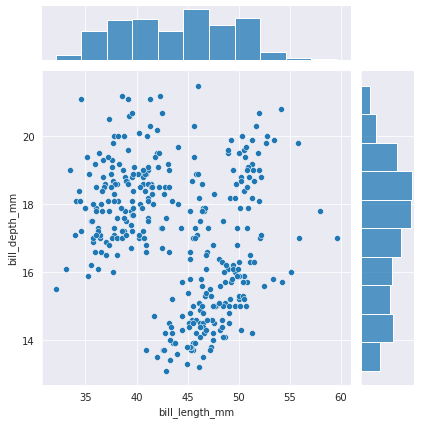

In [61]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Similar to **displot()**, setting a different **`kind="kde"`** in jointplot() will change both the joint and marginal plots the use **`kdeplot()`**:

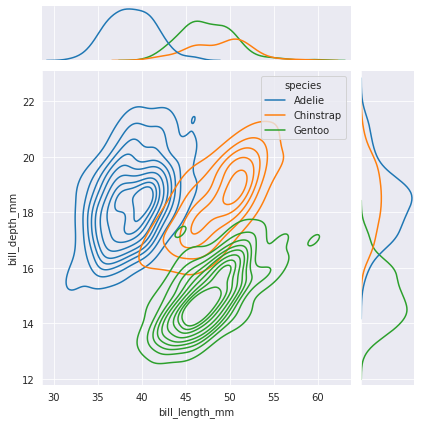

In [62]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

**`jointplot()`** is a convenient interface to the JointGrid class, which offeres more flexibility when used directly:

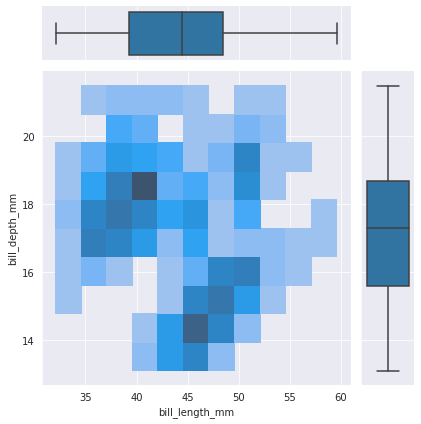

In [70]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into displot():

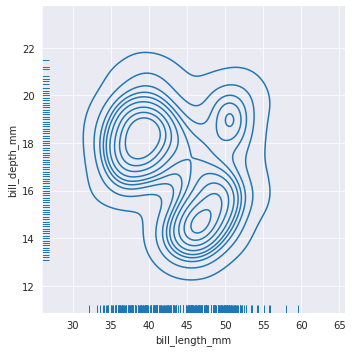

In [71]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

* And the axes-level rugplot() function can be used to add rugs on the side of any other kind of plot:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

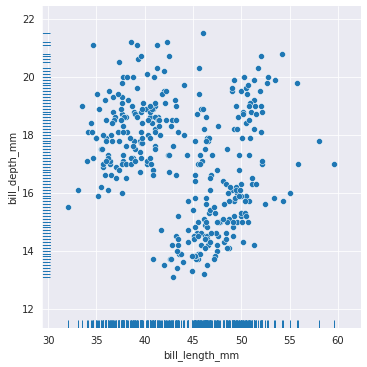

In [72]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

* The **`pairplot()`** function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a **`“small-multiple”`** approach to visualize the **`univariate distribution`** of all variables in a dataset along with all of their pairwise relationships:

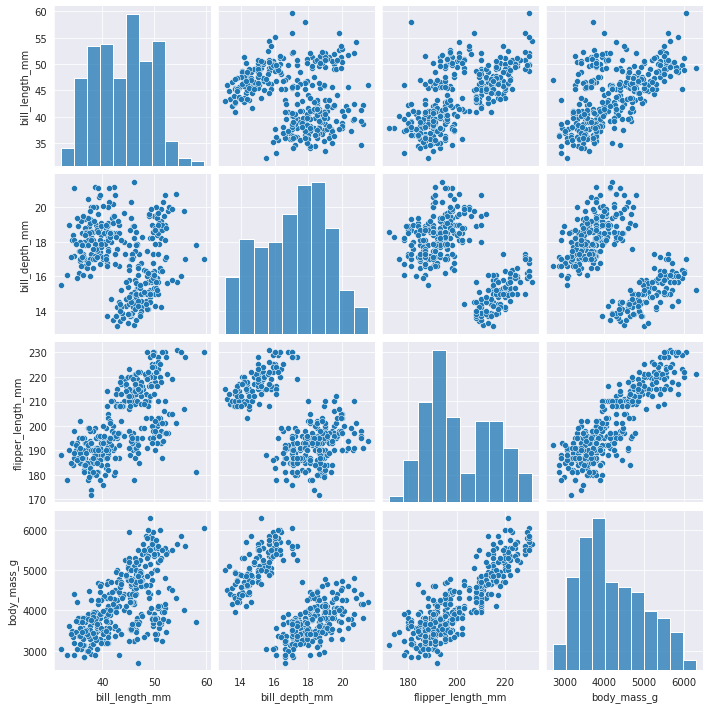

In [73]:
sns.pairplot(penguins)

* As with **`jointplot()/JointGrid`**, using the underlying PairGrid directly will afford more flexibility with only a bit more typing:

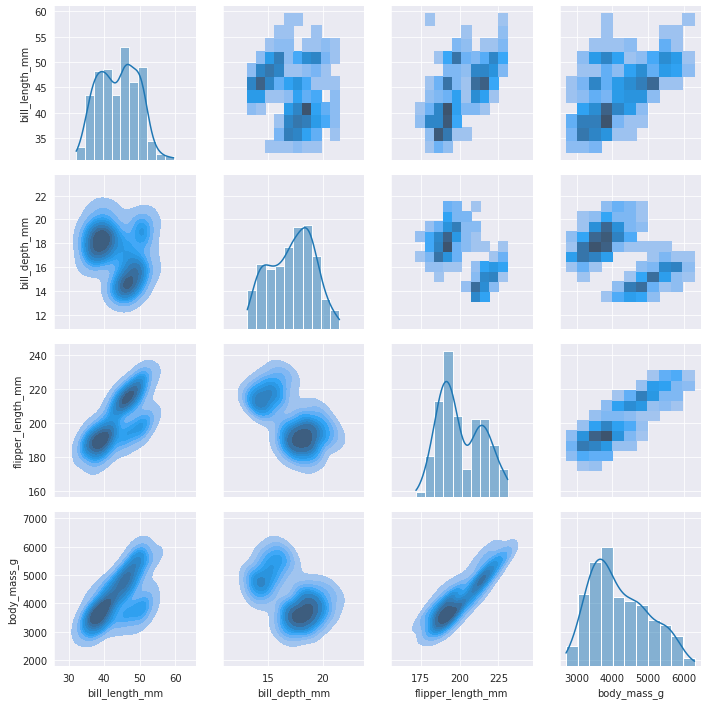

In [74]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)